In [19]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Excel into pandas dataframe
#Use Google gollab to import the file
data = pd.read_csv('bank-additional-full.csv')

data.shape
#To find correlation between the features
data.corr()
#Detailed summary of all the columns
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

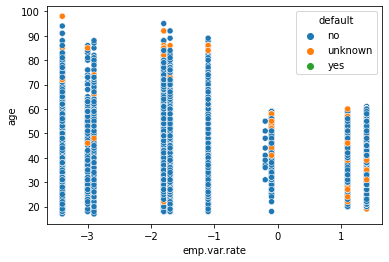

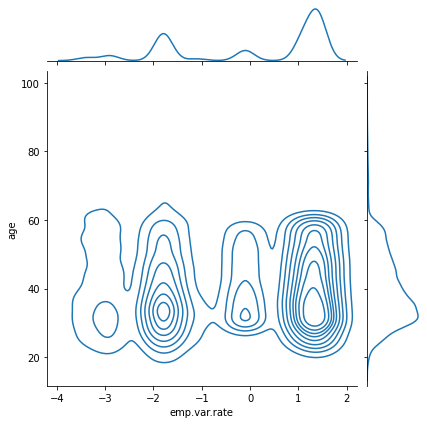

In [20]:
# Scatter plot comarision of emp.var.rate and age vs Default
sns.scatterplot(x='emp.var.rate',y='age',hue='default',data=data)
plt.show()


sns.jointplot(x ='emp.var.rate', y ='age', data = data ,kind ='kde')
# KDE shows the density where the points match up the most

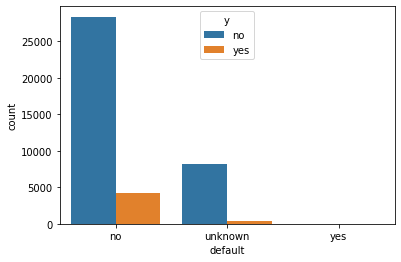

In [21]:
#Countplot to visualize term deposit vs Default customers
sns.countplot(x='default', hue='y', data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distribution

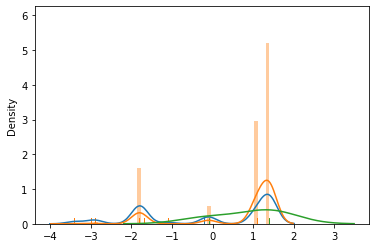

In [22]:
#Label Encoder 
from sklearn.preprocessing import LabelEncoder
Label = LabelEncoder()

data['default'] = Label.fit_transform(data['default'])

# Sort the dataframe by target
target_0 = data.loc[data['default'] == 0]
target_1 = data.loc[data['default'] == 1]
target_2 = data.loc[data['default'] == 2]

#Distripution blot to find relation between employee variable rate and default features
sns.distplot(target_0[['emp.var.rate']], hist=False, rug=True)
sns.distplot(target_1[['emp.var.rate']], hist=True, rug=True)
sns.distplot(target_2[['emp.var.rate']], hist=False, rug=True)

plt.show()

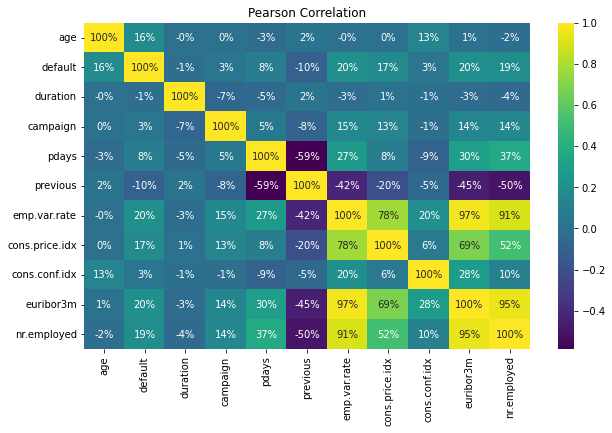

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [23]:
#visualize the correlation
plt.figure(figsize = (10,6))
sns.heatmap(data.corr(), annot = True,fmt='.0%' ,cmap = 'viridis')
plt.title("Pearson Correlation")
plt.show()

data.info()



In [24]:
#Dropping columns without any correlation
data.drop(['education','contact'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


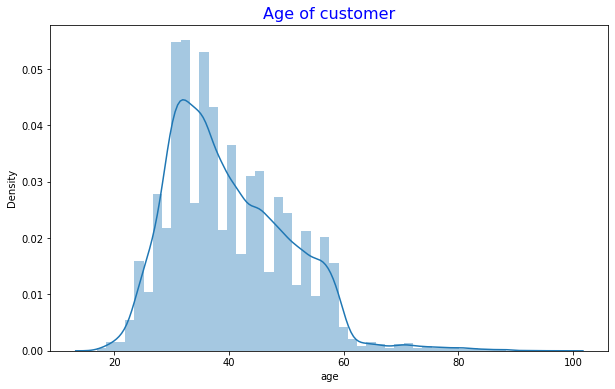

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   default         41188 non-null  int64  
 4   housing         41188 non-null  object 
 5   loan            41188 non-null  object 
 6   month           41188 non-null  object 
 7   day_of_week     41188 non-null  object 
 8   duration        41188 non-null  int64  
 9   campaign        41188 non-null  int64  
 10  pdays           41188 non-null  int64  
 11  previous        41188 non-null  int64  
 12  poutcome        41188 non-null  object 
 13  emp.var.rate    41188 non-null  float64
 14  cons.price.idx  41188 non-null  float64
 15  cons.conf.idx   41188 non-null  float64
 16  euribor3m       41188 non-null  float64
 17  nr.employed     41188 non-null 

In [25]:
#Setting figure size
plt.figure(figsize=(10,6))
#Distripution plot to show Age of customers
sns.distplot(data['age'])
plt.title('Age of customer',fontsize=16 , color='b')
plt.show()

data.info()



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


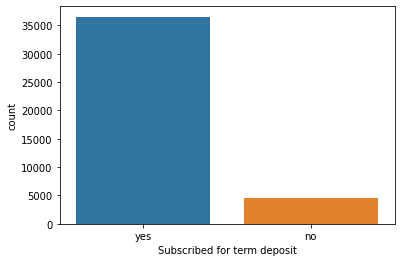

In [26]:

#converting from array to list and replacing categorical values with numerical encoding
for i in data.columns.tolist():
    data[i] = data[i].astype('category').cat.codes

#Imbalanced dataset visualization using count plot
g = sns.countplot(data['y'])
g.set_xticklabels(['yes','no'])
g.set(xlabel='Subscribed for term deposit')
plt.show()





0.7819699895193394


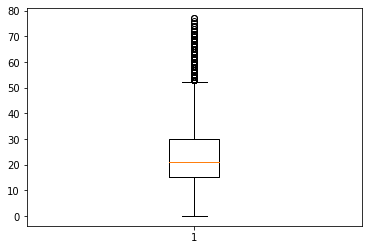

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             41188 non-null  int8 
 1   job             41188 non-null  int8 
 2   marital         41188 non-null  int8 
 3   default         41188 non-null  int8 
 4   housing         41188 non-null  int8 
 5   loan            41188 non-null  int8 
 6   month           41188 non-null  int8 
 7   day_of_week     41188 non-null  int8 
 8   duration        41188 non-null  int16
 9   campaign        41188 non-null  int8 
 10  pdays           41188 non-null  int8 
 11  previous        41188 non-null  int8 
 12  poutcome        41188 non-null  int8 
 13  emp.var.rate    41188 non-null  int8 
 14  cons.price.idx  41188 non-null  int8 
 15  cons.conf.idx   41188 non-null  int8 
 16  euribor3m       41188 non-null  int16
 17  nr.employed     41188 non-null  int8 
 18  y               41188 non-

0    32588
1     8597
2        3
Name: default, dtype: int64

In [27]:
from pandas._libs.hashtable import value_count
#Skewness for the Age variable

print(data['age'].skew())
#data["age"] = data["age"].astype("int64")
#data['age']=data[data['age']<60]

#Box plot to find outliers for Age variable
plt.boxplot(data['age'])
plt.show()

data.info()

data['default'].value_counts(0)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Age by Customer Subscription, Tele Marketing')

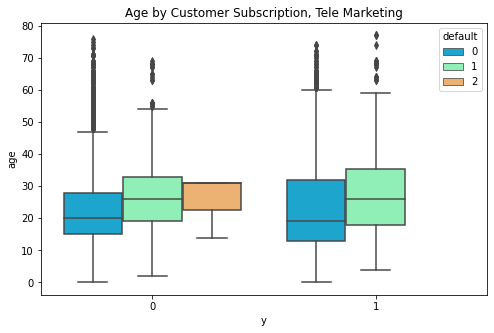

In [28]:
#Numeric Vs  Categorical Comparision
plt.figure(figsize=(8,5))
sns.boxplot(data['y'],data['age'],data=data,hue=data['default'], palette='rainbow')
plt.title("Age by Customer Subscription, Tele Marketing")



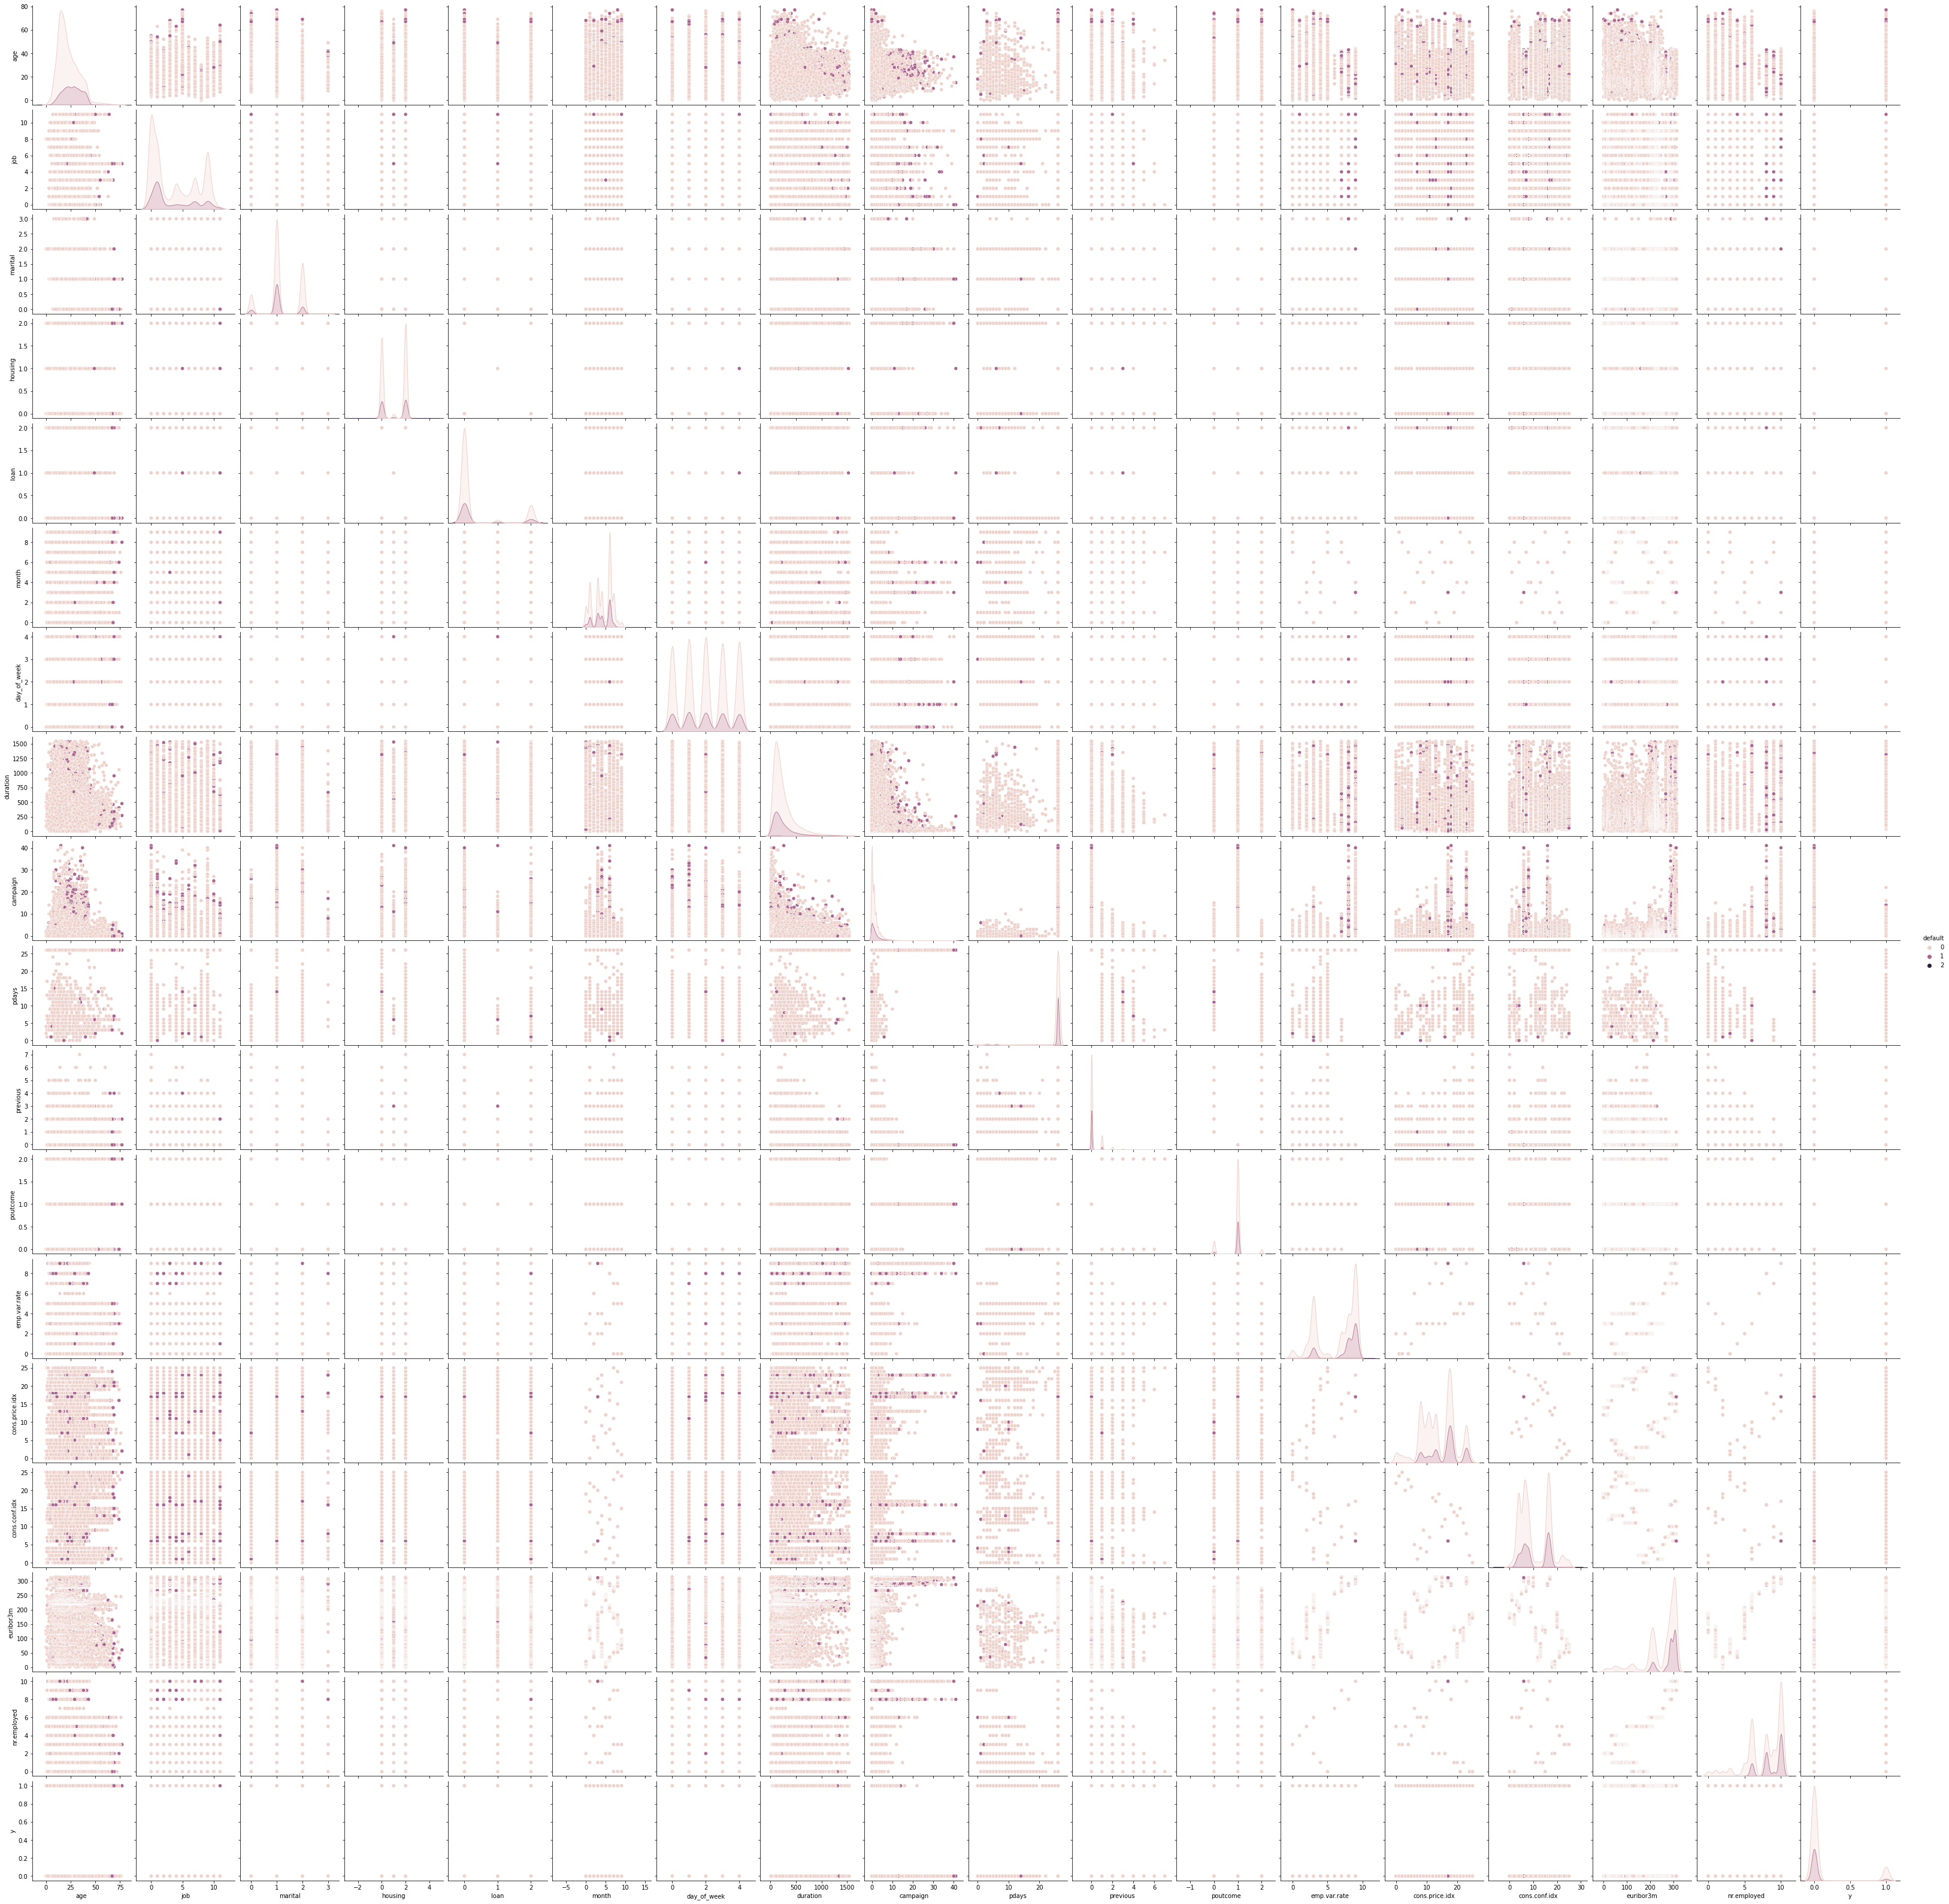

In [29]:
#General pairplot for all the features
sns.pairplot(data,hue='default')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


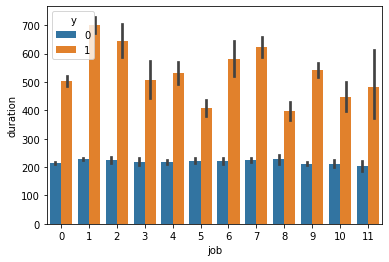

In [43]:
# Job v/s Duration of call barplot with respect to term deposit 
# 0 -represents not subscribed
# 1 -represents subscribed
sns.barplot(data['job'],
            data['duration'],
            hue = 'y',
            data = data)
 
# Show the plot
plt.show()

In [31]:
#Extracting Class/Target Labels
Y = data.default
#Extracting Data Attributes
data.drop(data.columns[[3]], axis=1, inplace=True)
#Drop Nan Values and replace with 0
X = data.fillna(0) 



In [48]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
#Train and test data split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Predicting Accuracy of the model before hyper parameter tuning
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print(X.shape,Y.shape)



(27595, 18) (13593, 18) (27595,) (13593,)
Accuracy: 0.7198558081365408
(41188, 18) (41188,)


In [77]:


# Create Decision Tree classifer object with entropy paramter
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct? 
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.7894504524387552


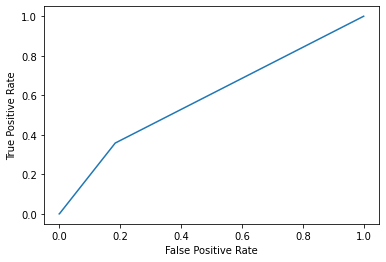

In [49]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = metrics.roc_curve(Y_test,y_pred)

#A Receiver Operator Characteristic (ROC) curve
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [76]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics

#calculating precision and reall
precision = precision_score(Y_test,y_pred,average="macro")
recall = recall_score(Y_test, y_pred,average="macro")
 
print('Precision: ',precision)
print('Recall: ',recall)

F1  = 2*((precision*recall)/(precision+recall))

print('F1 score:',F1)
 
#Plotting Precision-Recall Curve
#disp = plot_precision_recall_curve(model, X_test, Y_test)



Precision:  0.6591139943411793
Recall:  0.5610731814623555
F1 score: 0.6061548475262957


In [36]:
metrics.classification_report(y_pred,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       1.00      0.79      0.88     13593\n           1       0.00      0.00      0.00         0\n\n    accuracy                           0.79     13593\n   macro avg       0.50      0.39      0.44     13593\nweighted avg       1.00      0.79      0.88     13593\n'

In [37]:
from scipy import stats

z=np.abs(stats.zscore(data['age']))

print(z)
#Calculating Z score 
z=np.abs(stats.zscore(data))
print(data.shape)
#Eliminating Z score more than 3 - oulliers deletion
new_data = (z<3).all(axis=1)
data1 = data[new_data]
print(data1.shape)


out = np.where(z>3)
data1.head

[1.5334083  1.62938803 0.29020655 ... 1.5334083  0.38165155 3.26104342]
(41188, 18)
(36217, 18)


<bound method NDFrame.head of        age  job  marital  housing  loan  month  day_of_week  duration  \
0       39    3        1        0     0      6            1       261   
1       40    7        1        0     0      6            1       149   
2       20    7        1        2     0      6            1       226   
3       23    0        1        0     0      6            1       151   
4       39    7        1        0     2      6            1       307   
...    ...  ...      ...      ...   ...    ...          ...       ...   
40545   14    0        2        0     0      1            3       241   
40548   39    5        1        0     0      1            3       634   
40549   41    5        0        0     0      1            3        34   
40550   17    1        1        2     0      1            3       298   
40551   27    0        2        2     0      1            3        27   

       campaign  pdays  previous  poutcome  emp.var.rate  cons.price.idx  \
0             0  

In [38]:
#inter quantile range

#calculate interquartile range of values in the 'points' column
'''q75, q25 = np.percentile(df['points'], [75 ,25])
iqr = q75 - q25

#display interquartile range 
iqr'''

Q1 = data1['age'].quantile(.25)
Q3 = data1['age'].quantile(.75)

IQR = Q3 - Q1

print(IQR)

lower = Q1 -1.5*IQR
upper = Q3 +1.5*IQR

print('upper {0} lower {1}'.format(upper,lower))

#lower = Q1-1.5*

15.0
upper 52.5 lower -7.5


In [52]:

'''#Extracting Class/Target Labels
Y1 = data1['default']
#Extracting Data Attributes
data1.drop(data1.columns[[3]], axis=1, inplace=True)
#Drop Nan Values and replace with 0
X1 = data1.fillna(0) '''

"#Extracting Class/Target Labels\nY1 = data1['default']\n#Extracting Data Attributes\ndata1.drop(data1.columns[[3]], axis=1, inplace=True)\n#Drop Nan Values and replace with 0\nX1 = data1.fillna(0) "

In [53]:
'''from imblearn.over_sampling import SMOTE

X,Y = SMOTE().fit_resample(X,Y)

print(X.shape,Y.shape)


# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))'''


'from imblearn.over_sampling import SMOTE\n\nX,Y = SMOTE().fit_resample(X,Y)\n\nprint(X.shape,Y.shape)\n\n\n# Create Decision Tree classifer object\nclf = DecisionTreeClassifier(criterion="entropy", max_depth=3)\n\n# Train Decision Tree Classifer\nclf = clf.fit(X_train,Y_train)\n\n#Predict the response for test dataset\ny_pred = clf.predict(X_test)\n\n# Model Accuracy, how often is the classifier correct?\nprint("Accuracy:",metrics.accuracy_score(Y_test, y_pred))'

In [54]:
from sklearn.preprocessing import StandardScaler

# Initialise the Scaler
scaler = StandardScaler()
 
# standardization 
data = scaler.fit_transform(data) 


In [56]:
from sklearn.model_selection import GridSearchCV

#the hyperparameter that minimizes the error or maximizes the score on the validation set. 

params = {'criterion':['gini','entropy'],
          'max_depth':range(1,10),
          'min_samples_split':range(1,10)
            }

grid = GridSearchCV(clf,
                    param_grid = params,
                    cv= 5,
                    verbose = 1)


grid.fit(X_train,Y_train)






Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [57]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 9}

In [58]:
grid.best_score_

0.7975720239173765

In [67]:
from imblearn.over_sampling import SMOTE
# Create Decision Tree classifer object with hyper paramter tuning
clf = DecisionTreeClassifier(criterion="gini", max_depth=5,min_samples_split=2)

#Smote
#X_train, Y_train = SMOTE().fit_resample(X_train, Y_train)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

print(X_train.shape)

Accuracy: 0.7904068270433311
(27595, 18)


In [68]:
from sklearn.metrics import confusion_matrix
#Confusion matrix
matrix = confusion_matrix(Y_test,y_pred,labels=[1,0])

print('Confusion Matrix: \n', matrix)



Confusion Matrix: 
 [[  472  2390]
 [  459 10272]]


In [69]:
from matplotlib import pyplot

#Get Feature sImportance 
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
'''# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()'''

Feature: 0, Score: 0.35945
Feature: 1, Score: 0.22936
Feature: 2, Score: 0.01480
Feature: 3, Score: 0.00207
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00508
Feature: 8, Score: 0.00134
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.33220
Feature: 13, Score: 0.00123
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00442
Feature: 16, Score: 0.05004
Feature: 17, Score: 0.00000


'# plot feature importance\npyplot.bar([x for x in range(len(importance))], importance)\npyplot.show()'